# Kütüphanelerin Yüklenmesi

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Dataset Yüklenmesi ve İncelenmesi

Bu adımda veri setini yazılım ortamına alacağız ardından verilerle ilgili bir inceleme yapıp eksik verileri olması halinde o verilerle ilgileneceğiz.

Veri setinin yüklenmesi

In [36]:
df = pd.read_csv("2019_Mutluluk_Verisi.csv")

Veri setinin kolonları ve satırlarının incelenmesi.

In [37]:
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Veri setindeki değişkenlerin(kolonların) veri tipleri ve varsa null değerlerin sayısının incelenmesi.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Veri setindeki değişkenler ile ilgili bazı temel özelliklerin incelenmesi.

In [39]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


# Verilerin Görselleştirilmesi

Bu adımda tabloda mutluluk skoruna etki eden değişkenlerin etki miktarlarını inceleyeceğiz.

<Axes: title={'center': 'Mutluluk Skoru İle Diğer Değişkenler Arasındaki İlişki'}>

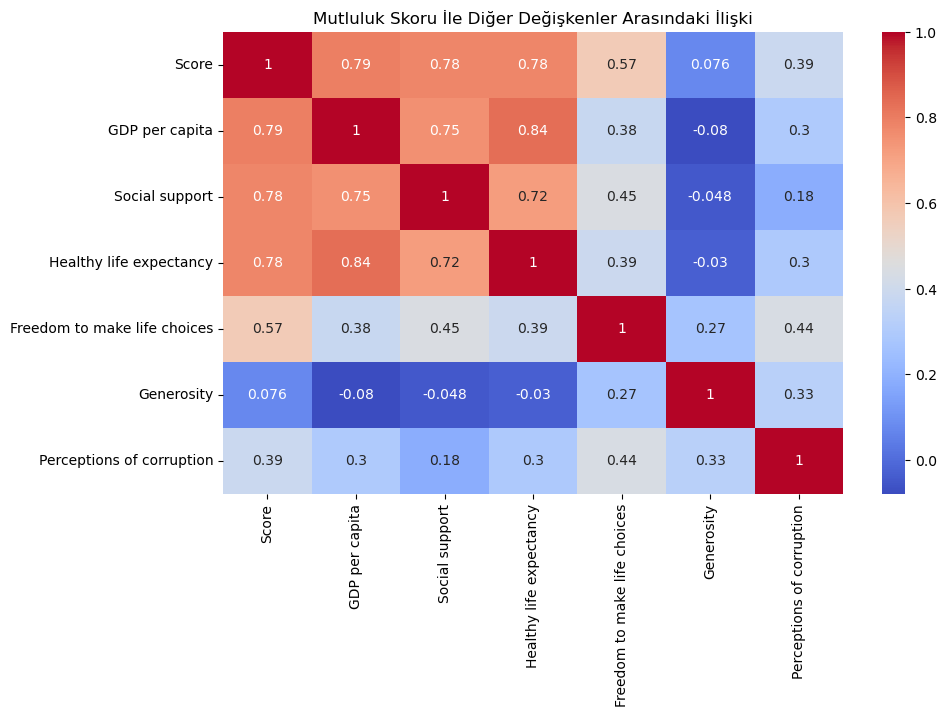

In [40]:
df = df.iloc[:, [2,3,4,5,6,7,8]]

plt.figure(figsize=(10, 6))
plt.title("Mutluluk Skoru İle Diğer Değişkenler Arasındaki İlişki")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [41]:
data = df[["Generosity", "Score"]]
data.sort_values(by="Generosity", ascending=False, inplace=True)
data

C:\Users\ozsat\AppData\Local\Temp\ipykernel_17108\2797952357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by="Generosity", ascending=False, inplace=True)


,Generosity,Score
130,0.566,4.360
91,0.498,5.192
146,0.419,3.597
21,0.375,6.726
120,0.372,4.509
...,...,...
41,0.043,6.149
88,0.036,5.208
89,0.035,5.208
147,0.025,3.488


# Modellerin Eğitilmesi

Veri setindeki verilerin eğitim ve test için bölünmesi.

In [42]:
x = df[['GDP per capita','Social support', 'Healthy life expectancy','Generosity','Freedom to make life choices']]
y = df['Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modellerin Eğitim Verisi ile Eğitilmesi

### 2. Derece Polinomsal Modelin Oluşturulması.

In [43]:
poly_d2 = PolynomialFeatures(degree=2)
x_train_poly_d2 = poly_d2.fit_transform(x_train)

poly_model_d2 = LinearRegression()
poly_model_d2.fit(x_train_poly_d2, y_train)

LinearRegression()

### 3. Derece Polinomsal Modelin Oluşturulması.

In [44]:
poly_d3 = PolynomialFeatures(degree=3)
x_train_poly_d3 = poly_d3.fit_transform(x_train)

poly_model_d3 = LinearRegression()
poly_model_d3.fit(x_train_poly_d3, y_train)

LinearRegression()

### Lineer Modelin Oluşturulması.

In [45]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

# Modellerden Tahmin Alınması

Eğitilen modellerin test verileri ile tahmin yaptırılması.

In [46]:
x_test_poly_d2 = poly_d2.transform(x_test)
y_pred_poly_d2 = poly_model_d2.predict(x_test_poly_d2)

x_test_poly_d3 = poly_d3.transform(x_test)
y_pred_poly_d3 = poly_model_d3.predict(x_test_poly_d3)

y_pred_linear = linear_model.predict(x_test)

# Modellerin Hata Paylarının İncelenmesi

Modellerin **R2** ve **MSE** skorunun hesaplanması

In [47]:
r2_poly_d2 = r2_score(y_test,y_pred_poly_d2)
r2_poly_d3 = r2_score(y_test,y_pred_poly_d3)
r2_linear = r2_score(y_test,y_pred_linear)

mse_poly_d2 = mean_squared_error(y_test, y_pred_poly_d2)
mse_poly_d3 = mean_squared_error(y_test, y_pred_poly_d3)
mse_linear = mean_squared_error(y_test, y_pred_linear)

mae_poly_d2 = mean_absolute_error(y_test, y_pred_poly_d2)
mae_poly_d3 = mean_absolute_error(y_test, y_pred_poly_d3)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

**R2** ve **MSE** skorlarının tablo olarak görselleştirilmesi

In [48]:
pd.DataFrame({
    'Model': ['2. Derece Polinomsal Model', '3. Derece Polinomsal Model', 'Lineer Model'],
    'R2 Skoru': [ r2_poly_d2, r2_poly_d3, r2_linear ],
    'MSE': [ mse_poly_d2, mse_poly_d3, mse_linear ],
    'MAE': [ mae_poly_d2, mae_poly_d3, mae_linear ]
})

,Model,R2 Skoru,MSE,MAE
0,2. Derece Polinomsal Model,0.655159,0.358884,0.446477
1,3. Derece Polinomsal Model,0.343640,0.683089,0.592619
2,Lineer Model,0.605684,0.410374,0.495860


# Modellerin Görselleştirilmesi

Modellerden alınan tahminlerin test verisindeki gerçek sonuçlar ile karşılaştırlıması.

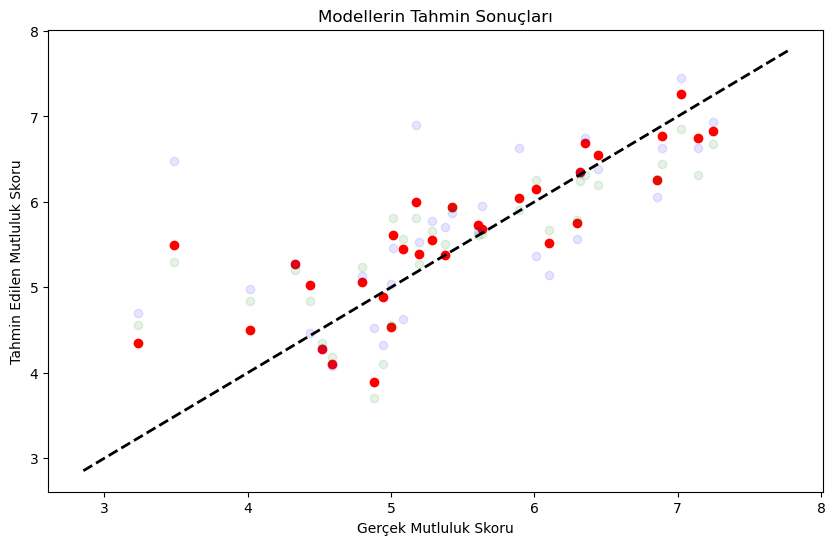

In [49]:
plt.figure(figsize=(10, 6))
plt.xlabel("Gerçek Mutluluk Skoru")
plt.ylabel("Tahmin Edilen Mutluluk Skoru")
plt.title("Modellerin Tahmin Sonuçları")
plt.scatter(y_test, y_pred_poly_d2, color='red', label='Polynomial Degree 2')
plt.scatter(y_test, y_pred_poly_d3, color='blue', label='Polynomial Degree 3',alpha=0.1)
plt.scatter(y_test, y_pred_linear, color='green', label='Linear Regression',alpha=0.1)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color='black', lw=2, ls='--', label='Perfect Prediction')

# Sonuç

**3 model incelendiğinde:**
* Veriye en uyumlu model **R2 Score**'a göre **poly_model_d2**
* En düşük hata payına sahip tahminleri yapan model **Mean Squared Error**'a göre **poly_model_d2**
* Veriye en uyumsuz model **R2 Score**'a göre **poly_model_d3**
* En yüksek hata payına sahip tahminleri yapan model **Mean Squared Error**'a göre **poly_model_d3**

Modellerimiz arasından veriye uyumu ve hata payının düşük olması sebebi ile en başarılı model **poly_model_d2**.

**poly_model_d2** her ne kadar burada en iyi sonucu alsada **R2 skoru**, **MSE** ve **MAE** istenilen seviyede değil, ama kabul edilebilir.